# Diabetes Prediction using various Classification Algorithms in Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Dataset using pandas

In [2]:
df=pd.read_csv("diabetes.csv")
df
print(df.shape)

(768, 9)


# Preprocess the Dataset

In [3]:
df=pd.concat([df]*2,ignore_index=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

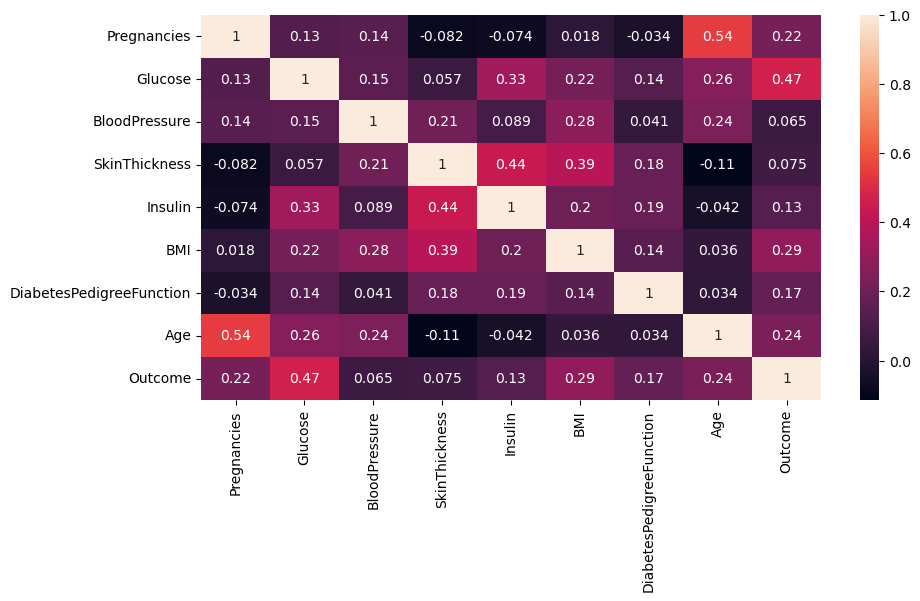

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                      10
BloodPressure                70
SkinThickness               454
Insulin                     748
BMI                          22
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

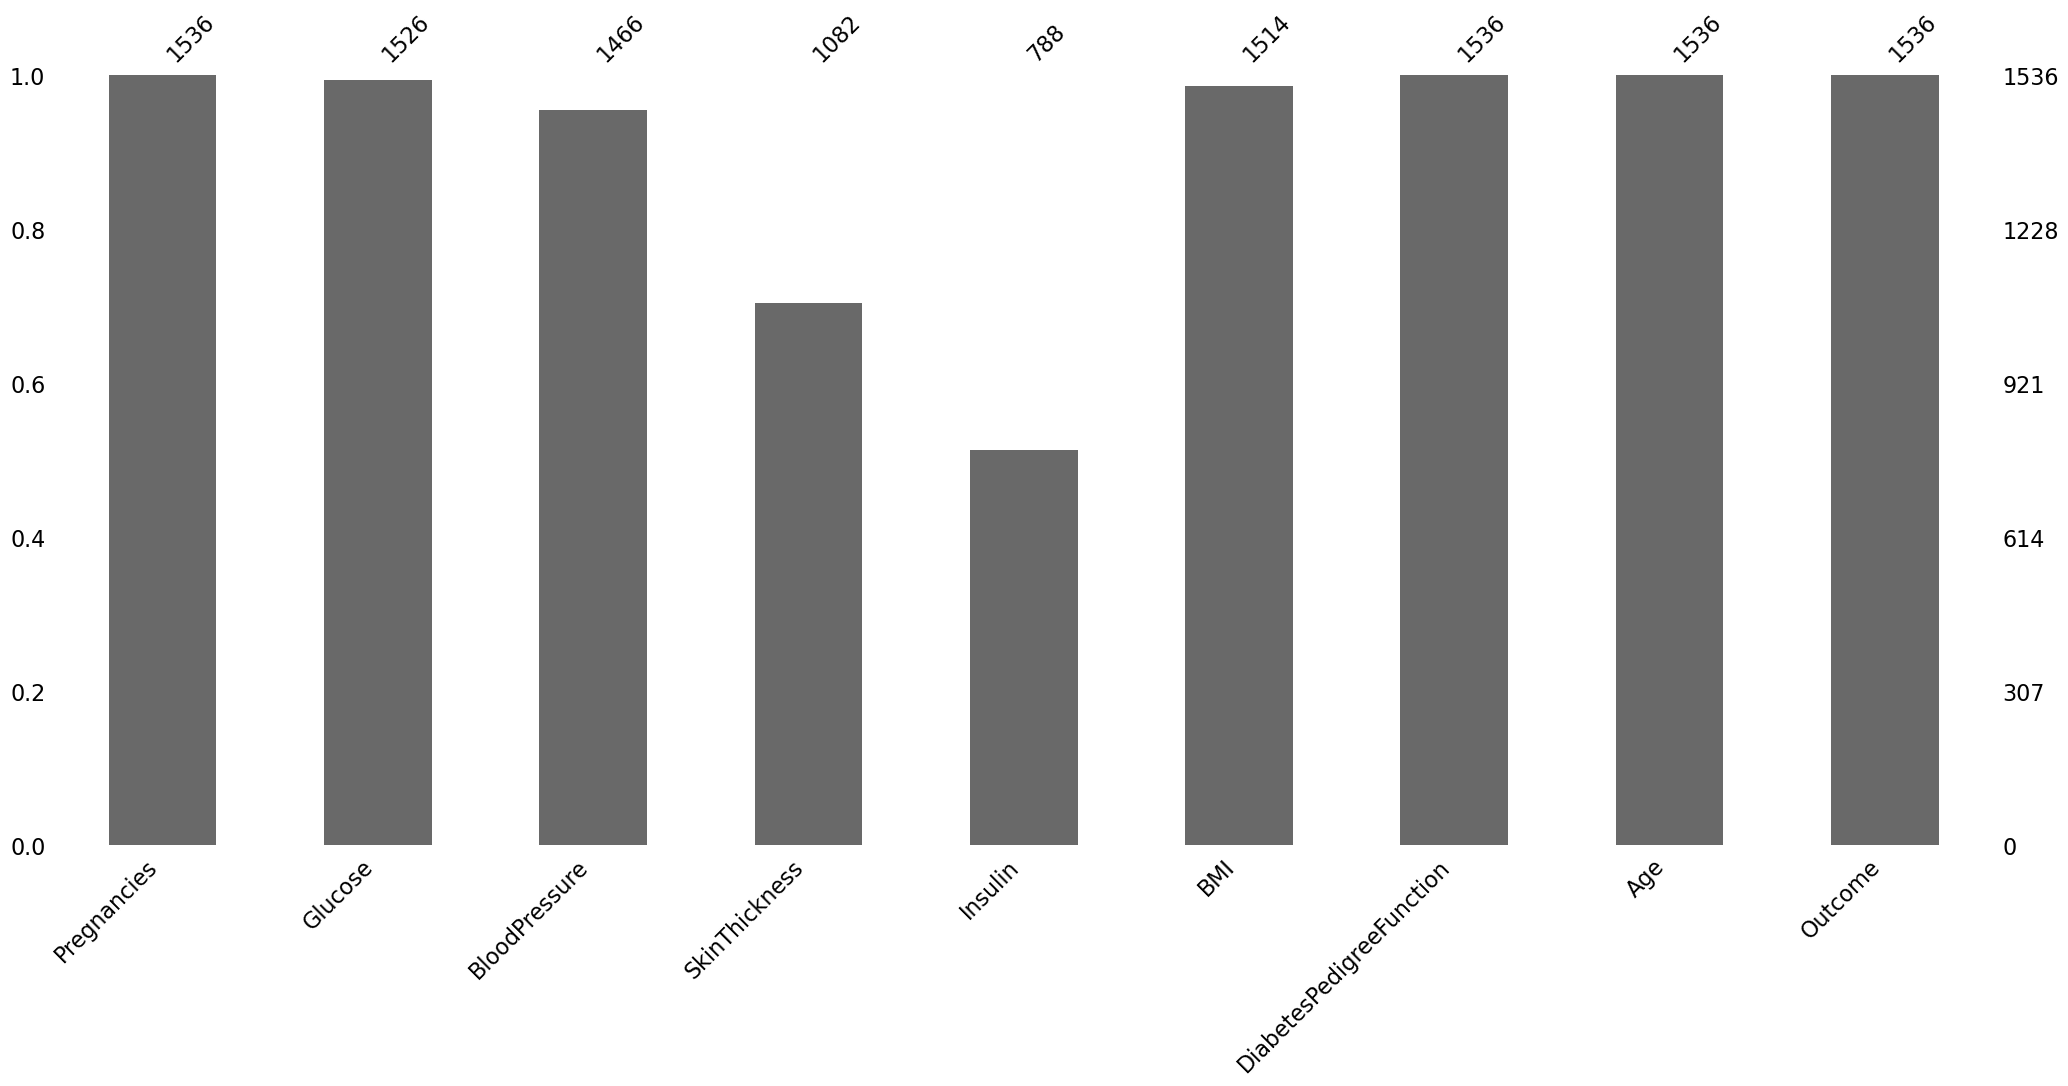

In [7]:
msno.bar(df)

In [8]:
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Split the Dataset

In [9]:
X = df.drop("Outcome", axis=1)
y =df["Outcome"]
print(y.value_counts())

0    1000
1     536
Name: Outcome, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [11]:
Model=[0,0,0,0,0,0,0]
Accuracy=[0,0,0,0,0,0,0]

# Classification Models

## 1. Decision Tree Classifier:

In [12]:
from sklearn import tree

In [13]:

Model[0] = tree.DecisionTreeClassifier()
Model[0] = Model[0].fit(X_train, y_train)
Model[0]

DecisionTreeClassifier()

In [14]:
Tree_pred = Model[0].predict(X_test)

In [15]:
Accuracy[0] = accuracy_score(y_test, Tree_pred)
print("Accuracy: ", Accuracy[0])

Accuracy:  0.9166666666666666


## 2. Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
Model[1]= GaussianNB()
Model[1].fit(X_train, y_train)

GaussianNB()

In [18]:
Navi_pred = Model[1].predict(X_test)

In [19]:
Accuracy[1] = accuracy_score(y_test, Navi_pred)
print("Accuracy:", Accuracy[1])

Accuracy: 0.7447916666666666


## 3. Support Vector Classifier

In [20]:
from sklearn.svm import SVC

In [21]:
Model[2] = SVC(kernel='linear')
Model[2].fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
Svm_Pred = Model[2].predict(X_test)

In [23]:
Accuracy[2] = accuracy_score(y_test, Svm_Pred)
print("Accuracy:", Accuracy[2])

Accuracy: 0.7630208333333334


## 4. Gradient Boosting Classifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
Model[3] = GradientBoostingClassifier()
Model[3].fit(X_train, y_train)

GradientBoostingClassifier()

In [26]:
Boosting_pred = Model[3].predict(X_test)

In [27]:
Accuracy[3] = accuracy_score(y_test, Boosting_pred)
print("Accuracy:", Accuracy[3])

Accuracy: 0.8541666666666666


## 5. K nearest neighbor

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
Model[4] = KNeighborsClassifier(n_neighbors=5)
Model[4].fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
KNN_pred = Model[4].predict(X_test)

In [31]:
Accuracy[4] = accuracy_score(y_test, KNN_pred)
print("Accuracy:", Accuracy[4])

Accuracy: 0.7526041666666666


## 6. Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
Model[5] = RandomForestClassifier(n_estimators=100)
Model[5].fit(X_train, y_train)

RandomForestClassifier()

In [34]:
Ran_Fo_pred = Model[5].predict(X_test)

In [35]:
Accuracy[5] = accuracy_score(y_test,Ran_Fo_pred )
print("Accuracy:",Accuracy[5])
print(Model)

Accuracy: 0.921875
[DecisionTreeClassifier(), GaussianNB(), SVC(kernel='linear'), GradientBoostingClassifier(), KNeighborsClassifier(), RandomForestClassifier(), 0]


## 7. Extreme Gradient Boosting

In [36]:
import xgboost as xgb

In [37]:
Model[6] = xgb.XGBClassifier()
Model[6].fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
Xgb_pred = Model[6].predict(X_test)

In [39]:
Accuracy[6] = accuracy_score(y_test,Xgb_pred )
print("Accuracy:",Accuracy[6])

Accuracy: 0.9166666666666666


# Confusion Matrix for All Models

In [40]:
cm_1 = confusion_matrix(y_test, Tree_pred)
cm_2 = confusion_matrix(y_test, Navi_pred)
cm_3 = confusion_matrix(y_test, Svm_Pred)
cm_4 = confusion_matrix(y_test, Boosting_pred)
cm_5 = confusion_matrix(y_test, KNN_pred)
cm_6 = confusion_matrix(y_test, Ran_Fo_pred)
cm_7 = confusion_matrix(y_test, Xgb_pred)

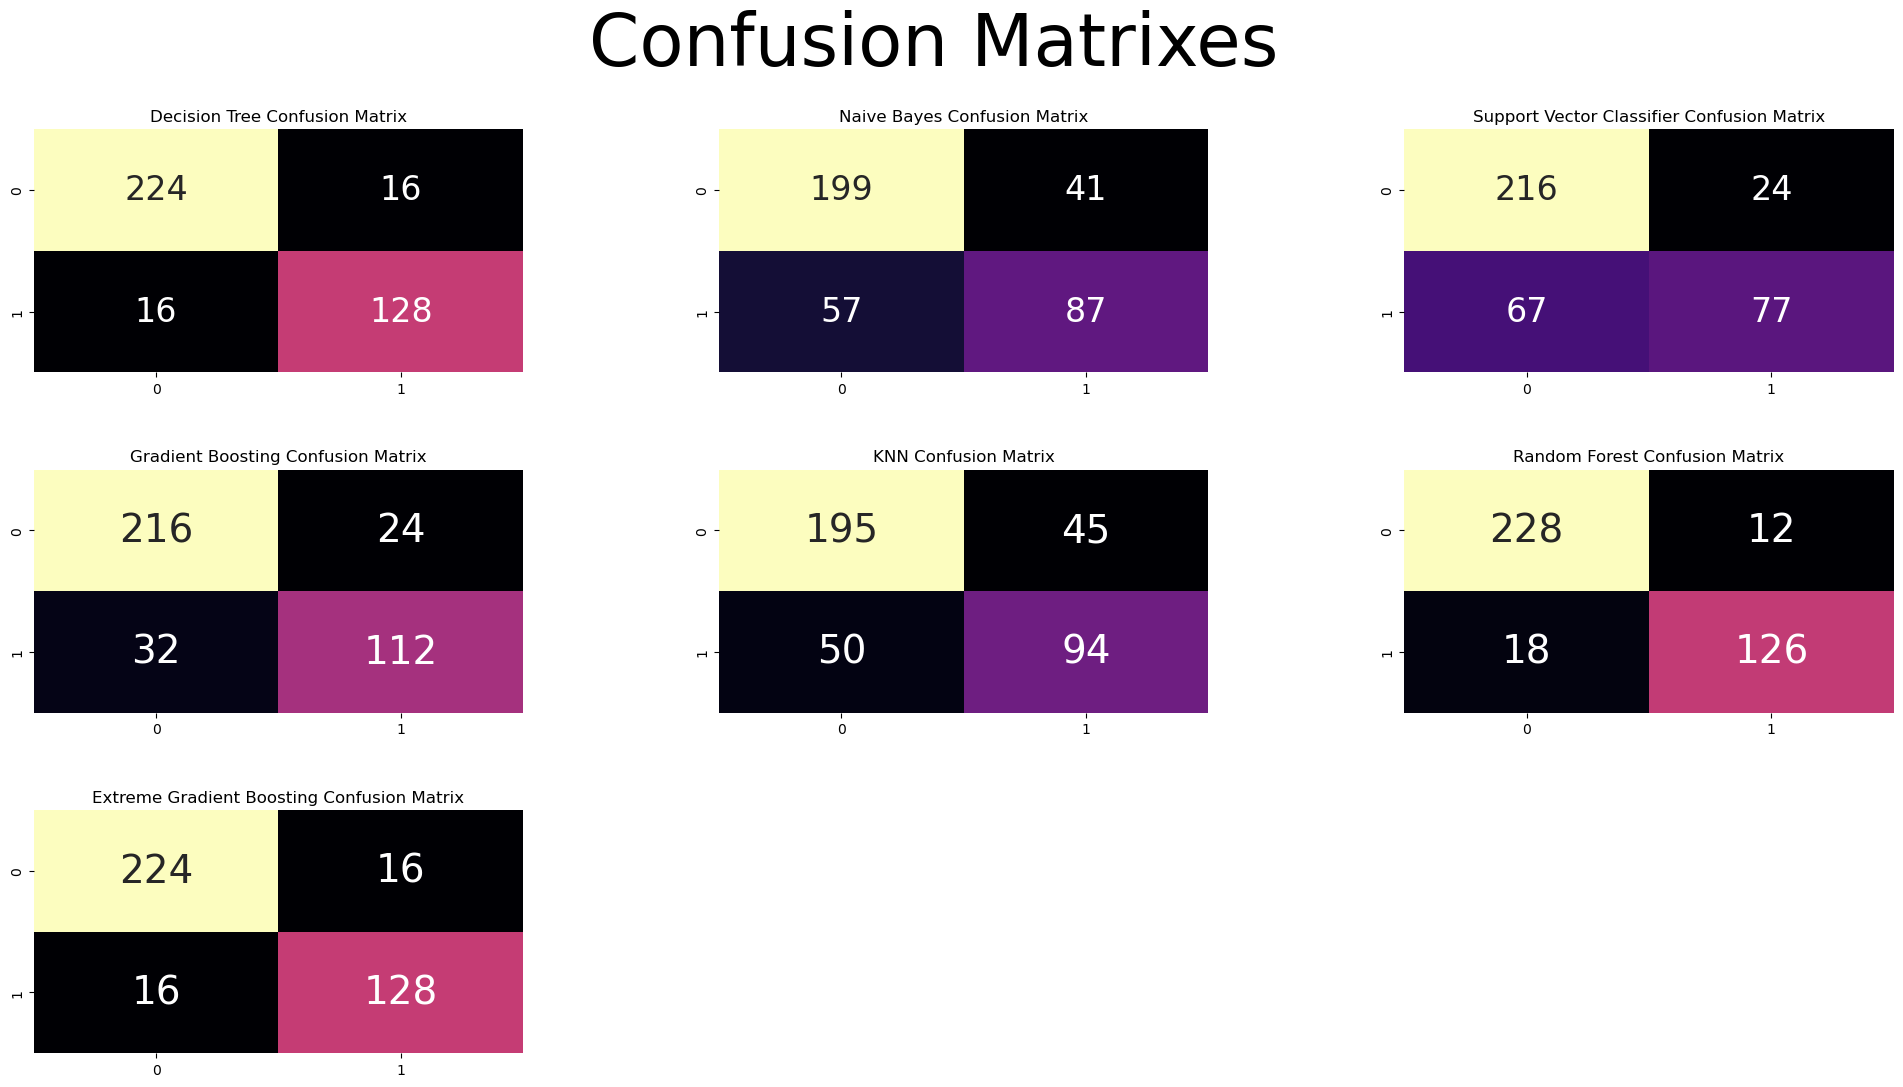

In [41]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=52)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_1,annot=True,cmap='magma',fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_2,annot=True,cmap='magma',fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Classifier Confusion Matrix")
sns.heatmap(cm_3,annot=True,cmap='magma',fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Gradient Boosting Confusion Matrix")
sns.heatmap(cm_4,annot=True,cmap='magma',fmt="d",cbar=False, annot_kws={"size": 28})

plt.subplot(3,3,5)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_5,annot=True,cmap='magma',fmt="d",cbar=False, annot_kws={"size": 28})
plt.subplot(3,3,6)

plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_6,annot=True,cmap='magma',fmt="d",cbar=False, annot_kws={"size": 28})
plt.subplot(3,3,7)
plt.title("Extreme Gradient Boosting Confusion Matrix")
sns.heatmap(cm_7,annot=True,cmap='magma',fmt="d",cbar=False, annot_kws={"size": 28})
plt.show()

In [42]:
print(Model)

[DecisionTreeClassifier(), GaussianNB(), SVC(kernel='linear'), GradientBoostingClassifier(), KNeighborsClassifier(), RandomForestClassifier(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)]


# Accuracy For All Models

In [43]:
#Accuracy level for the all algorithems
print("Decision Tree Classifier: {}%".format(int(Accuracy[0]*100)))
print("Naive Bayes Classifier: {}%".format(int(Accuracy[1]*100)))
print("Support Vector Classifier: {}%".format(int(Accuracy[2]*100)))
print("Gradient Boosting Classifier: {}%".format(int(Accuracy[3]*100)))
print("K Neighbors Classifier: {}%".format(int(Accuracy[4]*100)))
print("Random Forest Classifier: {}%".format(int(Accuracy[5]*100)))
print("Extreme Gradient Boosting Classifier: {}%".format(int(Accuracy[6]*100)))


Decision Tree Classifier: 91%
Naive Bayes Classifier: 74%
Support Vector Classifier: 76%
Gradient Boosting Classifier: 85%
K Neighbors Classifier: 75%
Random Forest Classifier: 92%
Extreme Gradient Boosting Classifier: 91%


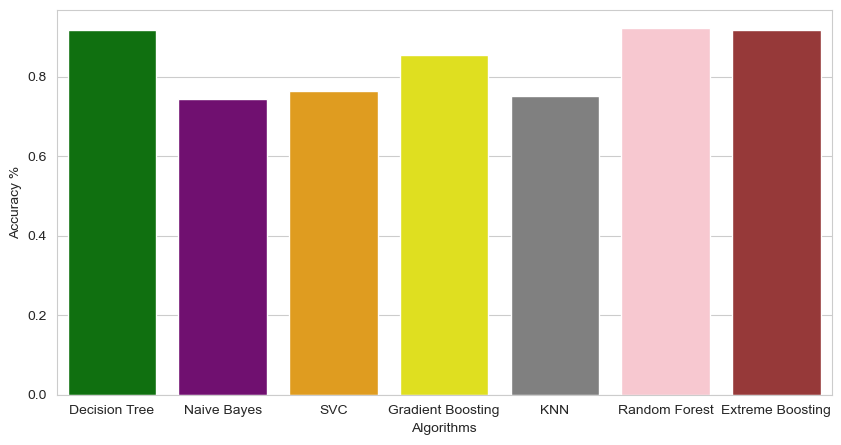

In [44]:
colors = ['green','purple','orange','yellow','gray','pink','brown']
x=["Decision Tree","Naive Bayes","SVC","Gradient Boosting","KNN","Random Forest","Extreme Boosting"]
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
# plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x, y=Accuracy, palette=colors)
plt.show()